### Decision Tree Regressor
Non-Linear Splits: Breaks down the dataset into smaller subsets (nodes) based on feature thresholds to capture non-linear patterns.

Interpretability: Highly transparent, as the model's logic can be visualized as a series of "if-then" rules.

No Scaling Required: Unlike SVR or Linear models, it is not sensitive to the scale of features, simplifying the preprocessing phase.

Flexibility: Naturally handles both numerical and categorical data, but requires max_depth control to prevent overfitting on complex datasets.


--- Decision Tree (max_depth=3) Performance ---
MAE: 6.9021
MSE: 74.2647
RMSE: 8.6177
R2 Score: 0.2268
Adjusted R2: 0.2268

--- Statistical Tests ---
Breusch-Pagan p-value: 0.0000


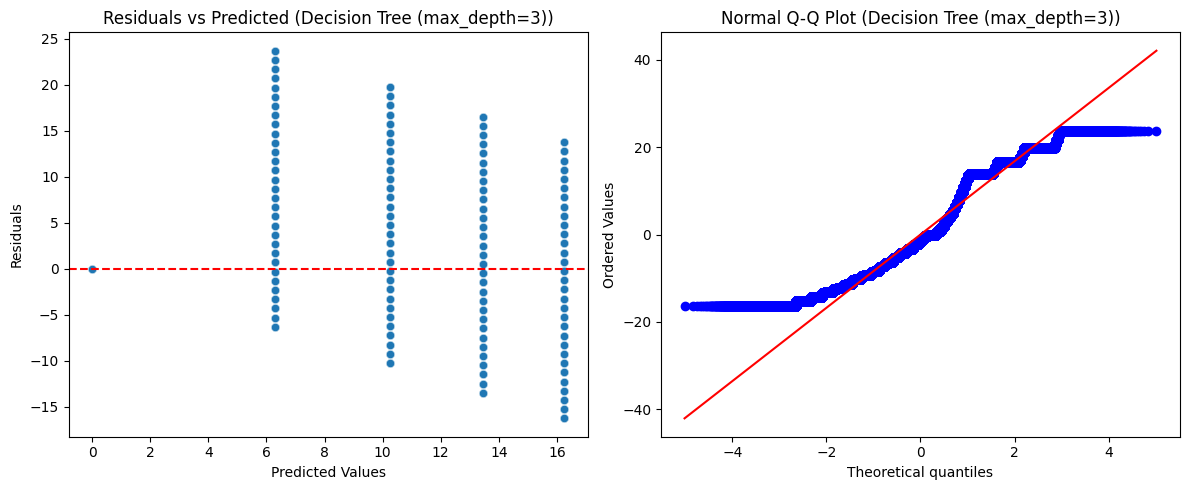

--- Decision Tree (max_depth=5) Performance ---
MAE: 6.8387
MSE: 73.3868
RMSE: 8.5666
R2 Score: 0.2360
Adjusted R2: 0.2360

--- Statistical Tests ---
Breusch-Pagan p-value: 0.0000


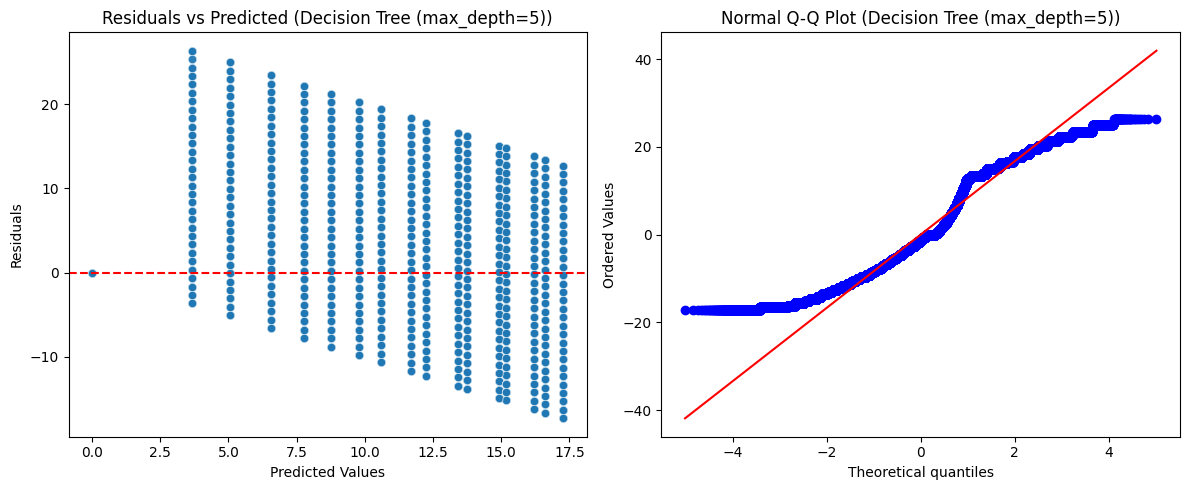

--- Decision Tree (max_depth=10) Performance ---
MAE: 6.8053
MSE: 72.8800
RMSE: 8.5370
R2 Score: 0.2412
Adjusted R2: 0.2412

--- Statistical Tests ---
Breusch-Pagan p-value: 0.0000


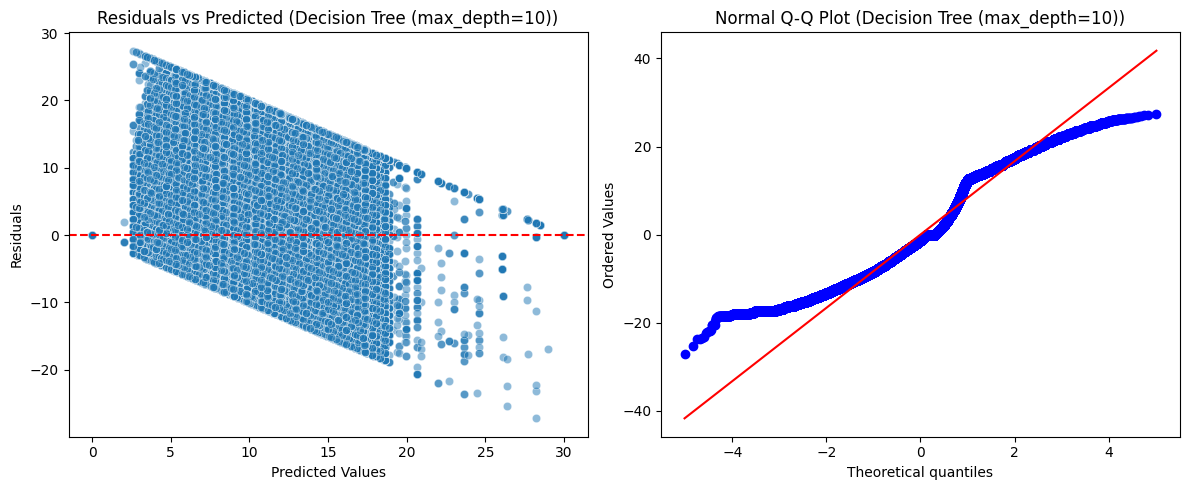

--- Decision Tree (max_depth=Unlimited) Performance ---
MAE: 6.5080
MSE: 106.9793
RMSE: 10.3431
R2 Score: -0.1138
Adjusted R2: -0.1138

--- Statistical Tests ---
Breusch-Pagan p-value: 0.0000


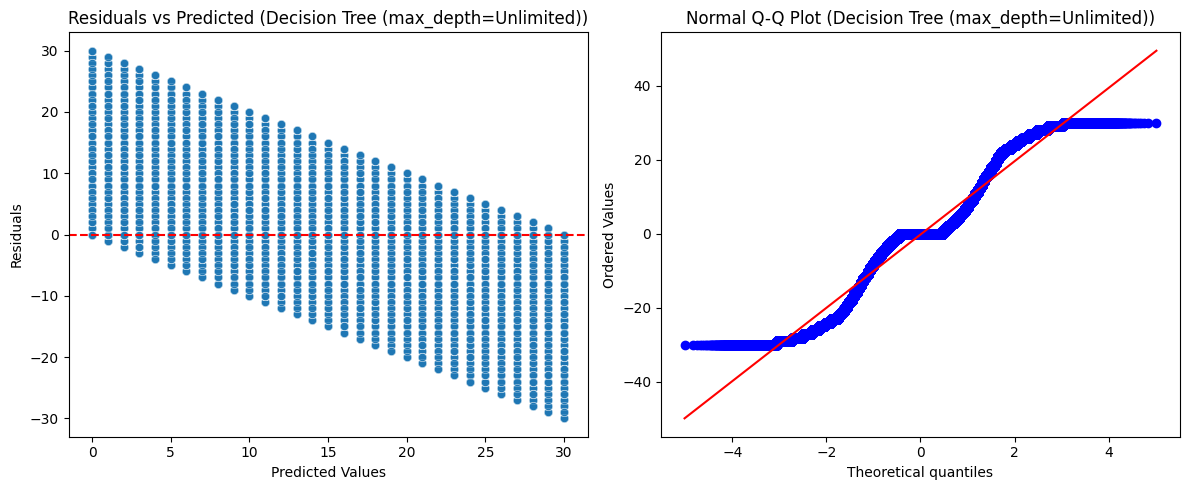

In [ ]:
# --- MODEL: Decision Tree Regressor ---
# Decision Trees are non-parametric and do not require feature scaling.
# We will test different depths to find the balance between underfitting and overfitting.

depths = [3, 5, 10, None] # None means the tree grows until all leaves are pure

for d in depths:

    dt_reg = DecisionTreeRegressor(max_depth=d, random_state=42)

    # Trees can handle larger datasets better than SVR/KNN,
    # but we use X_train_scaled to stay consistent with previous models
    dt_reg.fit(X_train_scaled, y_train)
    dt_pred = dt_reg.predict(X_test_scaled)

    # Numerical Evaluation
    depth_label = d if d is not None else "Unlimited"
    evaluate_regression(f"Decision Tree (max_depth={depth_label})", y_test, dt_pred, X_test_scaled)

    # Memory Management: Critical for tree-based models
    del dt_reg, dt_pred
    gc.collect()